# Programmatic Data Access

In tutorial `3.1 - How to query an API`, we explored how to access different
services using their APIs and the `requests` module. In this tutorial, we take a look at two `python` packages
that take care of this low-level connection to simplify our access to databases. This is particularly interesting
for when we want to efficiently query data for a
large number of objects. The packages we look at are `astroquery` and
`rocks`. Internally, both packages make use of APIs and the `requests` package to provide a direct programmatic interface to their databases.

The tutorial focuses on physical parameters of asteroids and comets. For meteorites, refer to the
lecture slides (and the expert-level tutorial).

## `astroquery`

[astroquery](https://astroquery.readthedocs.io/en/latest/) is an
[astropy](https://www.astropy.org/)-affiliated package providing access to
astronomical databases and catalogues. The strength of this package is the
large [number of
services](https://astroquery.readthedocs.io/en/latest/#available-services) that
can be queried with a uniform syntax. It can retrieve mission data from ESA's
planetary science archive, execute cone-searches in various catalogues (as we
saw on Tuesday), and provide data on a wide range of astrophysical objects.

For our purposes, we are interested in services that provide data on small bodies. We can split them into two categories:

**Orbital Parameters and Ephemerides**
- [IMCCE](https://astroquery.readthedocs.io/en/latest/imcce/imcce.html) - For Asteroids and Comets 
- [JPLHorizons](https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html) - For Asteroids and Comets 
- [MPC](https://astroquery.readthedocs.io/en/latest/mpc/mpc.html) - For Asteroids and Comets 
- [NEODys](https://astroquery.readthedocs.io/en/latest/solarsystem/neodys/neodys.html) - For Near-Earth Asteroids

**Physical Parameters**
- [MPC](https://astroquery.readthedocs.io/en/latest/mpc/mpc.html) - For asteroids and comets
- [JPL Small-Body Database](https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html) - For asteroids and comets.

Notebook `3.2 - Exercises` looks at the computation of ephemerides. We continue here with the physical parameters only, starting
with the Small-Body Database (SBDB).

### JPL Small-Body Database

The standard approach to query a service with `astroquery` is to import the service class and run a query function.
We see this pattern below with the `SBDB` class and its `query` function. The `query` function accepts a string as input
which identifies the object-of-interest, either by giving its name, number, or designation. To get physical parameters, we
have to set `phys=True`. We use the `python` built-in `pprint` command for pretty-printing the result (try running the regular `print` command
instead to see the benefit).

In [1]:
from astroquery.jplsbdb import SBDB
from pprint import pprint  # the pretty-printer for more readable output

data = SBDB.query('14328', phys=True)

pprint(data)

OrderedDict([('object',
              OrderedDict([('spkid', '20014328'),
                           ('neo', False),
                           ('fullname', '14328 Granvik (1980 VH)'),
                           ('des', '14328'),
                           ('prefix', None),
                           ('shortname', '14328 Granvik'),
                           ('pha', False),
                           ('orbit_id', '44'),
                           ('kind', 'an'),
                           ('orbit_class',
                            OrderedDict([('name', 'Main-belt Asteroid'),
                                         ('code', 'MBA')]))])),
             ('orbit',
              OrderedDict([('not_valid_after', None),
                           ('equinox', 'J2000'),
                           ('condition_code', '0'),
                           ('model_pars', []),
                           ('soln_date', '2024-01-20 16:54:25'),
                           ('moid_jup', <Quantity 2.1 AU>),
   

The output of this query is an `OrderedDict` - think of it like a regular `python` dictionary for now, where we access the
different values by indexing (this operation: `dict['key']`). The `data` object contains different kind of parameters:

In [2]:
data.keys()

odict_keys(['object', 'orbit', 'phys_par', 'signature'])

The physical ones are stored under the `phys_par` key.

In [3]:
data['phys_par']

OrderedDict([('H', 13.72),
             ('H_sig', None),
             ('H_ref', 'E2023-HG6'),
             ('H_note', None),
             ('diameter', <Quantity 8.27 km>),
             ('diameter_sig', <Quantity 0.377 km>),
             ('diameter_ref',
              'urn:nasa:pds:neowise_diameters_albedos::2.0[mainbelt] (http://adsabs.harvard.edu/abs/2011ApJ...741...68M)'),
             ('diameter_note', None),
             ('albedo', 0.113),
             ('albedo_sig', 0.023),
             ('albedo_ref',
              'urn:nasa:pds:neowise_diameters_albedos::2.0[mainbelt] (http://adsabs.harvard.edu/abs/2011ApJ...741...68M)'),
             ('albedo_note', None)])

We have data!

In [4]:
print(f"{data['object']['shortname']} has an albedo of {data['phys_par']['albedo']} +- {data['phys_par']['albedo_sig']} according to {data['phys_par']['albedo_ref']}.")

14328 Granvik has an albedo of 0.113 +- 0.023 according to urn:nasa:pds:neowise_diameters_albedos::2.0[mainbelt] (http://adsabs.harvard.edu/abs/2011ApJ...741...68M).


The example asteroid we chose here has only a few known physical parameters.
Change the query example above to e.g. `ceres` to a more exhaustive list of
parameters that JPL provides, such as density, taxonomy, and rotation period.

Using the `SBDB.query` function in a loop, we can thus get physical parameters
for a lot of objects quickly. It is not efficient yet, as we are sending one
query per object to the server which takes some time, but it is already much
more convenient than going through the web interface.

The SBDB also contains physical parameters of comets.

In [5]:
data = SBDB.query('67P', phys=True)

pprint(data['phys_par'])

OrderedDict([('M1', 12.9),
             ('M1_sig', 0.8),
             ('M1_ref', 'K213/6'),
             ('M1_note',
              '2 parameter fit from 3526 observations, autocmod 3.0f'),
             ('K1', 7.5),
             ('K1_sig', None),
             ('K1_ref', 'K213/6'),
             ('K1_note', 'autocmod 3.0f'),
             ('diameter', <Quantity 3.4 km>),
             ('diameter_sig', <Quantity 0.1 km>),
             ('diameter_ref', 'Sierks et al., Science 347, aaa1044 (2015)'),
             ('diameter_note', None),
             ('GM', <Quantity 6.622e-07 km3 / s2>),
             ('GM_sig', <Quantity 2.e-10 km3 / s2>),
             ('GM_ref', 'Patzold et al., Nature 530, 63 (2016)'),
             ('GM_note', None),
             ('density', <Quantity 0.533 g / cm3>),
             ('density_sig', <Quantity 0.006 g / cm3>),
             ('density_ref', 'Patzold et al., Nature 530, 63 (2016)'),
             ('density_note', None),
             ('rot_per', <Quantity 12.76129 h>

### Minor Planet Center

The Minor Planet Center database is accessible via the `MPC` class. We use the
`query_object` function to specify the type (`asteroid` or `comet`) and the
`name`, `number`, or `designation` of the target.

In [6]:
from astroquery.mpc import MPC

result = MPC.query_object('asteroid', name='ceres')
pprint(result)

[{'absolute_magnitude': '3.34',
  'aphelion_distance': '2.986',
  'arc_length': 81247,
  'argument_of_perihelion': '73.42179',
  'ascending_node': '80.2549626',
  'critical_list_numbered_object': False,
  'delta_v': 10.5,
  'designation': None,
  'earth_moid': 1.58323,
  'eccentricity': '0.0789126',
  'epoch': '2023-09-13.0',
  'epoch_jd': '2460200.5',
  'first_observation_date_used': '1801-01-02.0',
  'first_opposition_used': '1801',
  'inclination': '10.58688',
  'jupiter_moid': 2.08915,
  'km_neo': False,
  'last_observation_date_used': '2023-06-14.0',
  'last_opposition_used': '2023',
  'mars_moid': 0.93065,
  'mean_anomaly': '60.07879',
  'mean_daily_motion': '0.2141068',
  'mercury_moid': 2.1757,
  'name': 'Ceres',
  'neo': False,
  'number': 1,
  'observations': 7312,
  'oppositions': 123,
  'orbit_type': 0,
  'orbit_uncertainty': '0',
  'p_vector_x': '-0.88022703',
  'p_vector_y': '0.33426576',
  'p_vector_z': '0.3368483',
  'perihelion_date': '2022-12-06.3980021990740741',
  '

We see that, compared to the physical parameters available through SBDB, the ones in the MPC
database are rather limited (it's really only the `absolute_magnitude`).

In [7]:
result = MPC.query_object('comet', designation='67P')
pprint(result)

[{'aphelion_distance': '5.705',
  'argument_of_perihelion': '22.15799',
  'ascending_node': '36.3293805',
  'computer_name': 'Rudenko',
  'created_at': '2024-02-01T08:26:22Z',
  'designation': '67P',
  'earth_moid': None,
  'eccentricity': '0.6499787',
  'epoch': '2023-09-13.0',
  'epoch_jd': '2460200.5',
  'first_observation_date_used': '2010-01-28.0',
  'fragment': None,
  'inclination': '3.87178',
  'is_standard_epoch': None,
  'jupiter_moid': None,
  'last_observation_date_used': '2023-04-26.0',
  'mars_moid': None,
  'mean_anomaly': '104.20184',
  'mean_daily_motion': '0.15329564',
  'mercury_moid': None,
  'moid_orbit_epoch': None,
  'moid_reference': None,
  'n_or_d': '0000067',
  'neptune_moid': None,
  'non_grav_a1': '0.0787',
  'non_grav_a2': '0.011131',
  'non_grav_a3': None,
  'non_grav_style': 2,
  'number': 67,
  'number_dp': 5,
  'object_type': 'P',
  'observations': 8220,
  'one_line_format': '0067P       '
                     'K21B2255661702215798810363293805003871781

Nevertheless, this service deserves a mention here as it allows to query for asteroids and comets based on *shared orbital parameters*. We switch
to the `query_objects` function and look for asteroids with a maximum aphelion distance of 1AU. We only want their names, numbers, and designations returned.

In [8]:
targets = MPC.query_objects('asteroid', aphelion_distance_max=1, return_fields=['name,number,designation'])
print(f"Found {len(targets)} asteroids matching these orbital criteria.")
pprint(targets[:5])

Found 67 asteroids matching these orbital criteria.
[{'designation': None, 'name': 'Atira', 'number': 163693},
 {'designation': None, 'name': None, 'number': 164294},
 {'designation': None, 'name': None, 'number': 202683},
 {'designation': None, 'name': 'Duende', 'number': 367943},
 {'designation': None, 'name': '', 'number': 413563}]


This means that we can now dynamically define orbital populations that we want to study. In this context, "dynamical" means that we can change
the population that we study by changing the parameters, rather than providing a *static* list of objects.

For example, let's combine SBDB and MPC to get all albedos of the objects with aphelia inside the Earth's orbit.

In [9]:
targets = MPC.query_objects('asteroid', aphelion_distance_max=1, return_fields=['name,number,designation'])

albedos = []

for target in targets:

  # We have to check whether we pass the number or the designation as the
  # MPC reports "designation: None" as soon as an object is numbered
  data = SBDB.query(target['designation'] if target['designation'] is not None else target['number'], phys=True)

  # Check if albedo is known
  if 'albedo' in data['phys_par']:
      albedos.append((data['object']['fullname'], data['phys_par']['albedo']))

print(len(albedos))
print(albedos)

1
[('(2010 VK139)', 0.196)]


Well, we cannot do much with that, but you get the idea.

### Dynamical physical groups and the art of good code syntax

We see that we can get different data with `astroquery`,
making it a great package especially when you want to combine results from
different services. The uniform syntax to query different services helps getting started.

There are two points that we might improve upon. First, while we can
dynamically define objects-of-interest based on orbital parameters with the
MPC-SBDB combination, we cannot do so based on physical parameters ("Give me
all B-types in the Themis family"). There is simply no service in the `astroquery` universe
*for now* that offers this.

Second, the response to our queries are typically `astropy` tables, `pandas`
dataframes or dictionaries. This leads you to think about your analysis in
terms of table rows and columns ("The data I need is in row 4 column 'albedo'",
"I need to access the cells where the row matches this condition"), which
translates into uncomfortable coding and analysis. The same goes for
dictionaries: As we see in the code above, it is rather tedious to access the
nested values that we are interested in. Instead, we want to think and write code
that resembles more our language: "Give me the albedo of Vesta". This is a core concept
of *object-oriented programming* - we will see this in action now.

*(Granted, the second point is somewhat subjective, but I (MM) am writing this tutorial, so I get to decide
what to put here)*

We pass on to the second package, `rocks`

## `rocks` - client for SsODNet

`rocks` is the `python` interface of the
[SsODNet](https://ssp.imcce.fr/webservices/ssodnet) services of the IMCCE
([Berthier+2023](https://ui.adsabs.harvard.edu/abs/2023A&A...671A.151B/abstract)). Like
`astroquery`, it takes care of the connection to the server via the API,
greatly facilitating the queries. Unlike `astroquery`, it also transforms the
server results and presents them in a way that is better suited for the
scripted analysis: as a `python` class object, the `Rock`. We will see the
benefits of this below.

Let's see an example. To get data on a given object, you pass the name, number,
or designation to the `Rock` class.

In [10]:
import rocks

# retrieve and ingest ssoCard of (1) Ceres
ceres = rocks.Rock(1)

ceres

Rock(number=1, name='Ceres')

Behind the scenes, `rocks` identified our object of interest as (1) Ceres and
downloaded its [ssoCard](https://ssp.imcce.fr/webservices/ssodnet/api/ssocard),
i.e. the best estimates of a large number of physical and dynamical parameters.
You can access this data via the dot-notation.

In [12]:
print(ceres.name)
print(ceres.number)
print(ceres.type_)

Ceres
1
Dwarf Planet


For numerical parameters like the albedo, you can use the `value` attribute to access
the albedo itself, and the `error.min` and `error.max` to get the upper and lower errors.
Or just `error_` to get the mean of `error.min` and `error.max`.

In [13]:
print(ceres.albedo.value)
print(ceres.albedo.error_)

0.034
0.001


SsODNet only collects parameters which are supported by a peer-reviewed publication.
You can trace the parameter value you use by accessing the `bibref` attribute.

In [14]:
print(ceres.albedo.bibref.shortbib)
print(ceres.albedo.bibref.bibcode)

['Li+2016']
['2016ApJ...817L..22L']


##  Comparison to `astroquery` and SDBD

We see that accessing the data is intuitive and requires minimal code. The
small body is the principal object that we are working with, rather than being
one row in a `pandas.DataFrame` that we have to awkwardly index to access any
parameter. This is the benefit of using a specialised library like `rocks` to
access a single service. The downside compared to `astroquery` is that `rocks`
only connects to SsODNet while `astroquery` offers many more data products.

In terms of physical parameters, SsODNet offers more information than the SBDB.
Other parameters that are available through `rocks` include the
absolute_magnitude, colors, density, diameter, mass, phase function, spin,
taxonomy, and thermal inertia. You can have a look at the
[documentation](https://rocks.readthedocs.io) or the release article
([Berthier+2023](https://ui.adsabs.harvard.edu/abs/2023A&A...671A.151B/abstract))
to find out more.

A downside of `rocks`/SsODNet compared to the SBDB is that currently only
asteroids are supported: comets are a work-in-progress.

## Many Objects

We continue exploring `rocks`. If you have more than one asteroid in mind,
you use the `rocks.rocks` function to create many `Rock`s.

In [17]:
targets = rocks.rocks(['ceres', 2, '1804 RA', '4'])

for target in targets:
    print(f"The mass of ({target.number}) {target.name} is {target.mass.value:.2}+-{target.mass.error_:.2} [{target.mass.bibref.shortbib}].")

The mass of (1) Ceres is 9.4e+20+-1e+17 [['Russell+2016']].
The mass of (2) Pallas is 2e+20+-4e+17 [['Somenzi+2010', 'Zielenbach+2011', 'Pitjeva+2001', 'Baer+2011', 'Folkner+2009', 'Kuchynka+2013', 'Fienga+2008', 'Pitjeva+2005', 'Fienga+2014', 'Fienga+2013', 'Konopliv+2006', 'Viswanathan+2017', 'Pitjeva+2004', 'Konopliv+2011', 'Folkner+2014', 'Baer+2017', 'Pitjeva+2013', 'Baer+2008a', 'Pitjeva+2010', 'Fienga+2019', 'Goffin+2001', 'Michalak+2000', 'Goffin+2014', 'Hilton+1999']].
The mass of (3) Juno is 2.7e+19+-1.1e+18 [['Somenzi+2010', 'Zielenbach+2011', 'Fienga+2011', 'Fienga+2013', 'Folkner+2009', 'Konopliv+2011', 'Folkner+2014', 'Goffin+2014', 'Viswanathan+2017', 'Fienga+2019', 'Pitjeva+2010', 'Fienga+2020', 'Baer+2008b', 'Kuchynka+2013', 'Kochetova+2014', 'Pitjeva+2004', 'Fienga+2014', 'Baer+2011', 'Pitjeva+2013', 'Konopliv+2006', 'Baer+2017', 'Pitjeva+2005', 'Chernetenko+2002', 'Kochetova+2004']].
The mass of (4) Vesta is 2.6e+20+-1e+15 [['Russell+2012']].


For fun, let's graph the diameter versus the mass of the first 100 numbered asteroids, and colour-code them by their albedos.

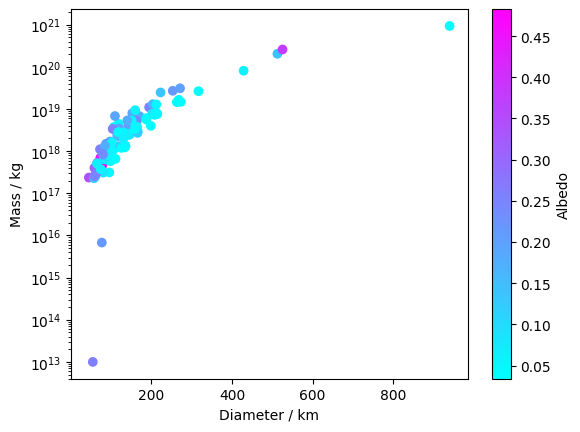

In [18]:
import matplotlib.pyplot as plt

# get data of first 100 numbered asteroids
targets = rocks.rocks(range(1, 101))

# get the parameters that we are interested in
diameters = [target.diameter.value for target in targets]
masses = [target.mass.value for target in targets]
albedos = [target.albedo.value for target in targets]

# and plot
fig, ax = plt.subplots()

scat = ax.scatter(diameters, masses, c=albedos, cmap='cool')
ax.set(xlabel='Diameter / km', ylabel='Mass / kg', yscale='log')
fig.colorbar(scat, label='Albedo')

It's not quite ready for a *Nature* paper yet, however, if we planned to publish this, we should of course cite our sources.

In [19]:
sources = [[target.diameter.bibref.bibcode, target.albedo.bibref.bibcode, target.mass.bibref.bibcode] for target in targets]
sources

[[['2016Sci...353.1008R'], ['2016ApJ...817L..22L'], ['2016Sci...353.1008R']],
 [['2021A&A...654A..56V',
   '2010Icar..205..460C',
   '2020NatAs...4..569M',
   '2017A&A...601A.114H'],
  ['2023A&A...671A.151B'],
  ['2010P&SS...58..858S',
   '2011AJ....142..120Z',
   '2001A&A...371..760P',
   '2011AJ....141..143B',
   '2009IPNPR.178C...1F',
   '2013Icar..222..243K',
   '2008A&A...477..315F',
   '2005SoSyR..39..176P',
   '2014arXiv1405.0484F',
   '2013arXiv1301.1510F',
   '2006Icar..182...23K',
   '2017NSTIM.108.....V',
   '2004cosp...35.2014P',
   '2011Icar..211..401K',
   '2014IPNPR.196C...1F',
   '2017AJ....154...76B',
   '2013SoSyR..47..386P',
   '2008CeMDA.100...27B',
   '2010IAUS..261..170P',
   '2020jsrs.conf..293F',
   '2001A&A...365..627G',
   '2000A&A...360..363M',
   '2014A&A...565A..56G',
   '1999AJ....117.1077H']],
 [['2015A&A...581L...3V', '2021A&A...654A..56V'],
  ['2023A&A...671A.151B'],
  ['2010P&SS...58..858S',
   '2011AJ....142..120Z',
   '2011CeMDA.111..363F',
   '2013a

Mmh, this is a list containing lists of strings. Not fun to work with. Let's use this *doubled list-comprehension* to turn it into a flat list of strings.
This is `python` magic, we don't need to understand it at this point, we just enjoy the benefits. We wrap it in `set()` call to remove duplicates.

In [20]:
sources = set([s for source in sources for s in source])
print(f"We have {len(sources)} sources to cite:")
sources

TypeError: unhashable type: 'ListWithAttributes'

From here, we can copy-paste the list of bibcodes into our LaTeX files.

We just did an analysis of a lot of objects with a few lines of code, including the often tedious bibliography
management. If our targets change, we can update the dynamical definition and just re-run the code to produce
all relevant figures and citations. Nice!

Let's go one step further.

### Many objects based on physical parameters

The "First 100 numbered asteroids" example above is rather artificial. Instead,
we might want to select asteroids based on shared physical properties. Using
the `Rock` class or the `rocks.rocks` function is not suitable here as we don't
know the parameters of the objects before we query them.

Instead, besides the single-object summary that is the ssoCard, SsODNet offers
the *Big Flat Table* (BFT) to access the attributes of *all* known asteroids.
This makes it easy to query for asteroids based on shared properties. In the example below,
we load this table and select all D-type asteroids.

In [23]:
# Load BFT as pandas DataFrame
bft = rocks.load_bft()

# Get asteroids that have been classified as D-type
dtypes = bft[bft['taxonomy.class'].isin(['D'])]
print(f"Found {len(dtypes)} asteroids.") 

Found 3534 asteroids.


Yes, you're right: We are using a `pandas` DataFrame here, and above we talked about the downsides of this.
However, we are currently not focused on a single object, but on a large number of them. It is perfectly fine here to think about
indexing a large table because that is in fact what we are doing: selecting based on shared properties.

Philosophical reasoning aside, the switch to the `pandas` DataFrame unfortunately comes with some tedious syntax again.
For example, to plot the proper semi-major axis versus the albedo of all our D-types, we write the following code.

[Text(0.5, 0, 'Proper Semi-major Axis / au'), Text(0, 0.5, 'Albedo')]

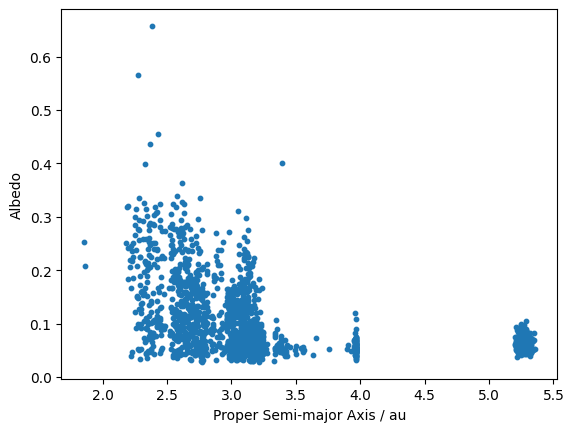

In [24]:
fig, ax = plt.subplots()

ax.scatter(dtypes["proper_elements.proper_semi_major_axis.value"], dtypes["albedo.value"], s=10)
ax.set(xlabel='Proper Semi-major Axis / au', ylabel='Albedo')

It's not pretty but it works well. And we can always switch back to using `Rock` representations of our objects (though I wouldn't recommend this
if you have more than ~500 objects):

In [25]:
dtypes = dtypes[:20]  # only use 20 of them for execution time, it's a proof-of-concept
dtypes = rocks.rocks(dtypes['sso_name'])
dtypes

[Rock(number=31037, name='Mydon'),
 Rock(number=31487, name='Parthchopra'),
 Rock(number=31696, name='Rohitmital'),
 Rock(number=31632, name='Stephaying'),
 Rock(number=34470, name='Chouruihua'),
 Rock(number=33748, name='Davegault'),
 Rock(number=34466, name='Ognicholls'),
 Rock(number=33964, name='Patrickshober'),
 Rock(number=23707, name='Chambliss'),
 Rock(number=24134, name='Cliffordkim'),
 Rock(number=23811, name='Connorivens'),
 Rock(number=24421, name='Djorgovski'),
 Rock(number=23808, name='Joshuahammer'),
 Rock(number=24587, name='Kapaneus'),
 Rock(number=24129, name='Oliviahu'),
 Rock(number=24292, name='Susanragan'),
 Rock(number=4524, name='Barklajdetolli'),
 Rock(number=4318, name='Bata'),
 Rock(number=4446, name='Carolyn'),
 Rock(number=4169, name='Celsius')]

That's it for the basic introduction to getting physical parameters of asteroids and comets with `astroquery` and `rocks`. The advanced
part of this tutorial considers a general application of `astroquery` and `rocks` to a catalogue of asteroid observations, while in the expert-level tutorial,
we build our own little tool to get meteorite classifications programmatically from the Meteoritical Bulletin.